https://goo.gl/0Eht9W


https://goo.gl/j1MSKe

In [25]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from  sklearn.linear_model import LinearRegression


In [26]:
oecd_bli=pd.read_csv('oecd_bli_2015.csv',thousands=',')

In [27]:
gdp_per_capita=pd.read_csv('gdp_per_capita.xls',thousands=',',delimiter='\t',encoding='latin1',na_values="n/a")

In [28]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [29]:
country_stats=prepare_country_stats(oecd_bli,gdp_per_capita)


In [30]:
country_stats

,GDP per capita,Life satisfaction
Country,,
Brazil,8669.998,6.4
Mexico,9009.280,6.5
Russia,9054.914,5.8
Turkey,9437.372,5.5
Poland,12495.334,6.1
Latvia,13618.569,5.9
Lithuania,14210.280,5.9
Slovak Republic,15991.736,6.2
Czech Republic,17256.918,6.7


In [15]:
X=np.c_[country_stats["GDP per capita"]]
y=np.c_[country_stats["Life satisfaction"]]

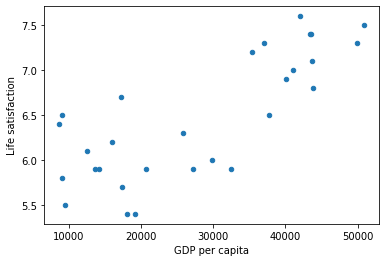

In [16]:
country_stats.plot(kind='scatter',x="GDP per capita",y='Life satisfaction')
plt.show()

In [20]:
X

array([[ 8669.998],
       [ 9009.28 ],
       [ 9054.914],
       [ 9437.372],
       [12495.334],
       [13618.569],
       [14210.28 ],
       [15991.736],
       [17256.918],
       [17288.083],
       [18064.288],
       [19121.592],
       [20732.482],
       [25864.721],
       [27195.197],
       [29866.581],
       [32485.545],
       [35343.336],
       [37044.891],
       [37675.006],
       [40106.632],
       [40996.511],
       [41973.988],
       [43331.961],
       [43603.115],
       [43724.031],
       [43770.688],
       [49866.266],
       [50854.583]])

In [17]:
model=LinearRegression()

In [18]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
X_new=[[8669]]
print(model.predict(X_new))

[[5.71949589]]
